In [1]:
# LIBRERIAS
import matplotlib
from ipywidgets.widgets.widget_string import Label
import numpy as np
from scipy.stats import norm
import matplotlib.pylab as plt
from scipy import stats
import pandas as pd

%matplotlib inline 
#matplotlib.rc('xtick', labelsize=20) 
#matplotlib.rc('ytick', labelsize=20) 
font = {'weight' : 'bold',
        'size'   : 15}
matplotlib.rc('font', **font)
import seaborn as sns
import os
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import shapiro 
#to en otra carpeta


In [2]:
# Función ajustar
def zscanTH2(z,focal,beta,L,Pavg,Tp,wl,D,Cf,alfa,R,freq):

    Leff = (1. - np.exp(-alfa*L))/alfa # Effective thickness
    w0 = 2.0*wl*focal*Cf/(np.pi*D) # beam waist
    z0 = np.pi*w0**2/wl # Rayleigh range
    w = w0*np.sqrt(1 + (z/z0)**2) # Beam radius
    I0 = 4*np.sqrt(np.log(2))*Pavg/(Tp*freq*np.pi**1.5*w**2) # Peak intensity at sample
    B = beta*(1.0 - R)*I0*Leff
    # Transmitance
    T=1-1/(2*np.sqrt(2))*beta*(1-R)*I0*Leff/(1+(z/z0)**2)
    #T = [sum((-B[i])**m/(m + 1.0)*p(m) for m in range(0,N))
        ##  for i in range(len(B))]
    return T

# Función ajustar
def fscanTH2(focal,beta,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq):

    Leff = (1. - np.exp(-alfa*L))/alfa # Effective thickness
    w0 = 2.0*wl*focal*Cf/(np.pi*D) # beam waist
    z0 = np.pi*w0**2/wl # Rayleigh range
    w = w0*np.sqrt(1 + ((ds - focal)/z0)**2) # Beam radius
    I0 = 4*np.sqrt(np.log(2))*Pavg/(Tp*freq*np.pi**1.5*w**2) # Peak intensity at sample
    B = beta*(1.0 - R)*I0*Leff
    # Transmitance
    T=1-1/(2*np.sqrt(2))*beta*(1-R)*I0*Leff/(1+((ds-focal)/z0)**2)
    #T = [sum((-B[i])**m/(m + 1.0)*p(m) for m in range(0,N))
        ##  for i in range(len(B))]
    return T


Text(0.5, 1.0, '$b)$')

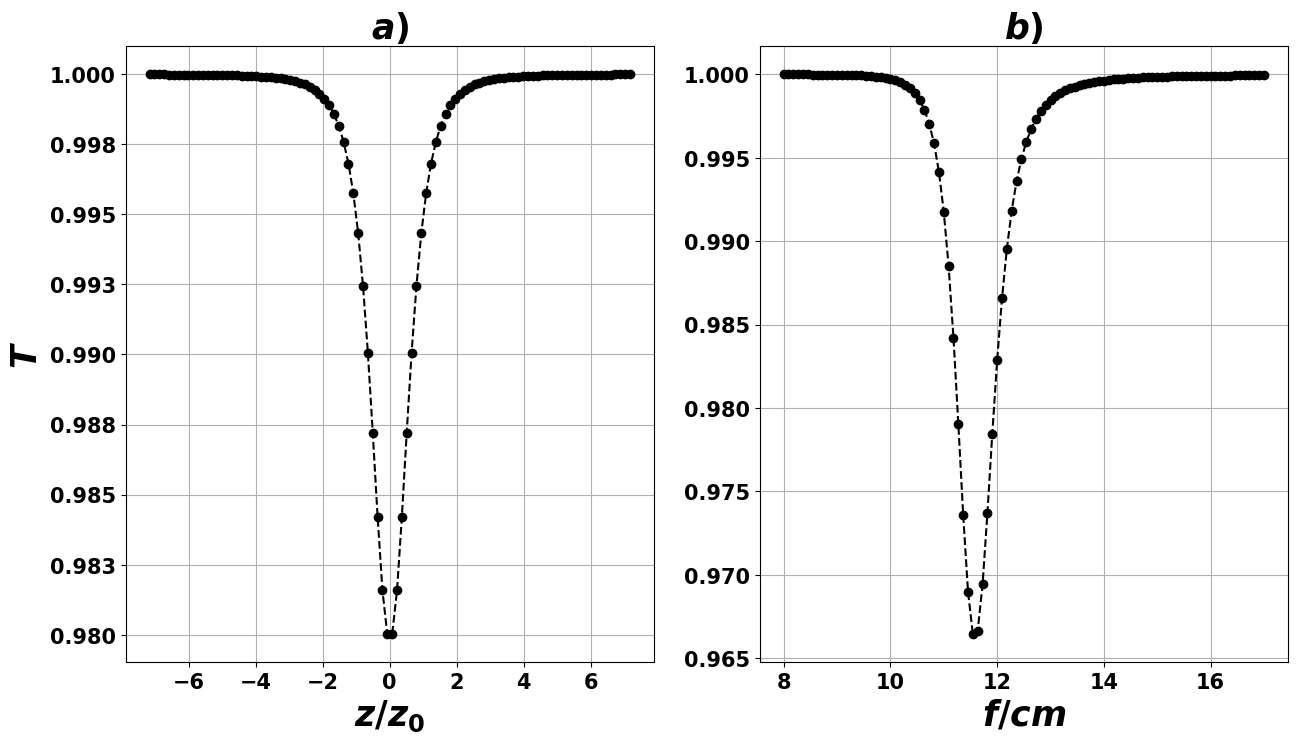

In [8]:
fig=plt.figure(figsize=(15,8))
from matplotlib.ticker import StrMethodFormatter
plt.subplot(121)
beta = 3.4e-11 # TPA seed in (m/W )
L= 1e-3 # thickness in (m).
Pavg = 200e-3# Average power in (W)
Tp =  200e-15 # pulse width FWHM in (s)
wl =790e-9 #central wavelength in (m)
D = 2e-3 # beam diameter in (m)
focal =15e-2 # Distance EFTL-sample (m)a
Cf = 1.36 # beam correction coeff
alfa = 2.6e-1 # linear absorption in (1/m) 
R =0.33 # reflection percentage 
freq = 90.6e6#Frecuencia en HZ
w0 = 2.0*wl*focal*Cf/(np.pi*D) # beam waist
z0 = np.pi*w0**2/wl # Rayleigh range
z=np.linspace(-1/2*focal,1/2*focal,100)#focal distance [m]
T=(zscanTH2(z,focal,beta,L,Pavg,Tp,wl,D,Cf,alfa,R,freq)) #Señal simulada
plt.plot(z/z0,T,'--ko',label='simulated signal')
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.3f}'))

plt.title('$a)$',fontsize=25)
plt.xlabel('$z/z_0$',fontsize=25)
plt.ylabel('$T$',fontsize=25)
plt.grid()
#plt.plot(corriente,Td,'--ro',label='derivada')

plt.subplot(122)
######################## PARAMETROS QUE SE ASUMEN COMO LOS REALES
focal=np.linspace(8,17,100)*1e-2#focal distance [m]
beta = 3.4e-11 # TPA seed in (m/W )
L= 1.0e-3 # thickness in (m).
Pavg = 200e-3# Average power in (W)
Tp =  200e-15 # pulse width FWHM in (s)
wl =790e-9 #central wavelength in (m)
D = 2e-3 # beam diameter in (m)
ds = 116.0e-3# Distance EFTL-sample (m)a
Cf = 1.36 # beam correction coeff
alfa = 2.6e-1 # linear absorption in (1/m) 
R =0.33 # reflection percentage 
freq = 90.6e6#Frecuencia en HZ
plt.grid()
T=list(fscanTH2(focal,beta,L,Pavg,Tp,wl,D,ds,Cf,alfa,R,freq)) #Señal simulada
val_min=min(T)
index=T.index(min(T))

plt.plot(focal*100,T,'--ko',label='simulated signal')
#plt.plot(corriente,Td,'--ro',label='derivada')
#plt.ylabel('$T$',fontsize=20)
plt.xlabel('$f/cm$',fontsize=25)
plt.title('$b)$',fontsize=25)


[0.999996725300418,
 0.9999565150785201,
 0.9984630907065788,
 0.9737214701193518,
 0.998689562788447,
 0.9997449931251166,
 0.9998994758896073,
 0.999944595379572]